# Aprendizaje supervisado parte 2 -- Regresión

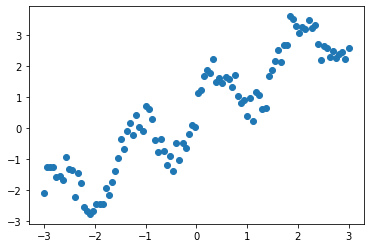

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
from sklearn.metrics import precision_score

#Creamos onda sinusoide con ruido
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
plt.plot(x, y, 'o');

Rendimiento del modelo con datos de entrenamiento
0.8189190775347295
Rendimiento del modelo con datos de test
0.7994321405079685
Pendiente
[0.90211711]
Ordenada al origen
0.44840974988268


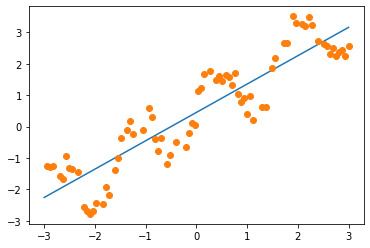

In [2]:
#Necesitamos los datos como array 2D
X = x[:, np.newaxis] 

#Separamos los datos en test y entrenamiento 
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.25,
                                                   random_state=42)
#Entrenamos el modelo
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

#Parametros obtenidos 
print("Rendimiento del modelo con datos de entrenamiento")
print(regressor.score(X_train, y_train))
print("Rendimiento del modelo con datos de test")
print(regressor.score(X_test, y_test))
print("Pendiente")
print(regressor.coef_)
print("Ordenada al origen")
print(regressor.intercept_)

#Dibujamos la recta a partir de y = ax + b
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o');

Predecimos de acuerdo con los datos de entrenamiento para ver como los puntos se predicen sobre la misma linea. 

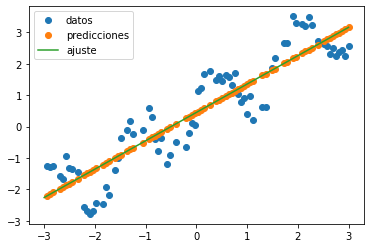

In [3]:

prediction = regressor.predict(X_train)
plt.plot(X_train, y_train, 'o', label="datos")
plt.plot(X_train, prediction, 'o', label="predicciones")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='ajuste')
plt.legend(loc='best')


Ahora predecimos con los datos de test para comparar 


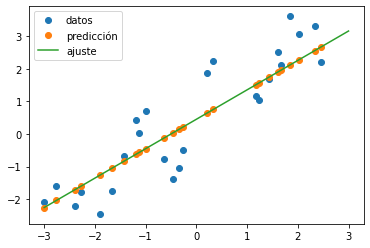

In [4]:
y_pred_test = regressor.predict(X_test)
plt.plot(X_test, y_test, 'o', label="datos")
plt.plot(X_test, y_pred_test, 'o', label="predicción")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='ajuste')
plt.legend(loc='best');

<div class="alert alert-success">
    <b>EJERCICIO</b>:
     <ul>
      <li>
      Añade una característica que consista en `sin(4x)` a la matriz `X` y vuelve a ajustar el modelo. Visualiza las predicciones con este modelo más complejo, aunque aún lineal.
      </li>
    </ul>
</div>

Lo primero que hacemos es agregar la caracteristica del sin(4x). Una vez que agregamos esta caracteristica dejamos de tener una matriz unidimensional para pasar a tener una matriz 100 x 2, por lo que el problema deja de ser de regresion linea simple y pasa a ser de regresion lineal multiple.

Volvemos a entrenar el modelo y comparamos los resultados

In [5]:
x_1 = np.linspace(-3, 3, 100)
x_2 = np.sin(4 * x) + x 

y_multiple = np.sin(4 * x) + x + rng.uniform(size=len(x))
X_multiple = np.concatenate((x_1[:, np.newaxis],x_2[:, np.newaxis]), axis=1)

X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(X_multiple,y_multiple,
                                                   test_size=0.25,
                                                   random_state=42)

#Entrenamos el modelo
lr_multiple = linear_model.LinearRegression()
lr_multiple.fit(X_train_mult, y_train_mult)
prediction_mult = lr_multiple.predict(X_test_mult)
    
#Parametros obtenidos 
print("Rendimiento del modelo con datos de entrenamiento")
print(lr_multiple.score(X_train_mult, y_train_mult))
print("Rendimiento del modelo con datos de test")
print(lr_multiple.score(X_test_mult, y_test_mult))
print("Pendiente")
print(lr_multiple.coef_)
print("Ordenada al origen")
print(lr_multiple.intercept_)

Rendimiento del modelo con datos de entrenamiento
0.9743823073355086
Rendimiento del modelo con datos de test
0.9723463495605471
Pendiente
[0.03784728 0.9821961 ]
Ordenada al origen
0.501064352426507


phi_train=np.concatenate((unos_train,X_train,X_sin_train), axis=1)
phi_test=np.concatenate((unos_test,X_test,X_sin_test), axis=1)    
regressorPhi = LinearRegression()
regressorPhi.fit(phi_train, y_train)
print("score con los valores de test: ", regressorPhi.score(phi_test, y_test))
print("score con los valores de entrenamiento",regressorPhi.score(phi_train, y_train))

### Ahora pasamos a tener dos coeficientes, por lo que la formula se modifica

Podemos ver que el score mejoro. Pero ademas, podemos ver en el grafico de abajo, que ahora tenemos dos caracteristicas, y a su vez dos predicciones. Eso tiene sentido? Es decir, esta bien que tengamos como "dos predicciones"? 

Creo que si esta bien, porque en el grafico de abajo lo estamos viendo en 2D. Como agregamos una variable dependiente y tenemos un coeficiente mas en la formula, deberiamos ver el grafico en 3D. Entonces el ajuste que teniamos antes que era una linea, pasa a ser un plano. 

[ 3.51939547  1.45435886  0.8185302  -0.64838339 -0.79358372 -0.69950906
 -1.56649783  3.26667993 -1.79312883 -2.03204596 -2.40532171  0.27764585
  1.4104903   0.22434943  2.62829758 -1.33017869  2.2774026   2.56862653
 -2.13908241  0.31425852  1.79571243  2.970857   -0.4083616  -0.9148858
  0.72448285]


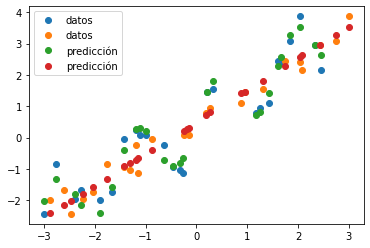

In [6]:
print(prediction_mult)
plt.plot(X_test_mult, y_test_mult, 'o', label="datos")
plt.plot(X_test_mult, prediction_mult, 'o', label="predicción")
plt.legend(loc='best');

Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

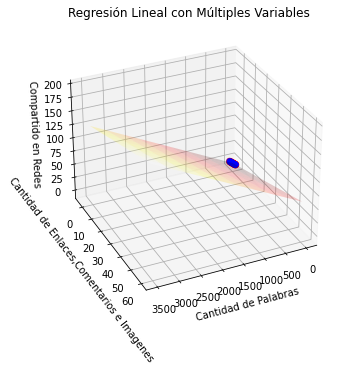

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
 
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
 
# calculamos los valores del plano para los puntos x e y
nuevoX = (lr_multiple.coef_[0] * xx)
nuevoY = (lr_multiple.coef_[1] * yy) 
 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + lr_multiple.intercept_)
 
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
 
# Graficamos en azul los puntos en 3D
ax.scatter(X_test_mult[:, 0], X_test_mult[:, 1], y_test_mult, c='blue',s=30)
 
# Graficamos en rojo, los puntos que 
ax.scatter(X_test_mult[:, 0], X_test_mult[:, 1], prediction_mult, c='red',s=40)
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

KNeighborsRegression
=======================

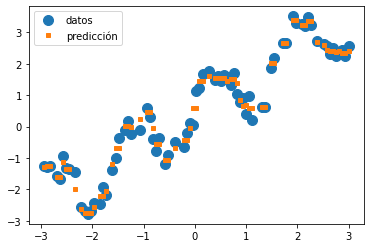

In [8]:
kneighbor_regression = KNeighborsRegressor(n_neighbors=2)
kneighbor_regression.fit(X_train, y_train)
y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="datos", markersize=10)
plt.plot(X_train, y_pred_train, 's', label="predicción", markersize=4)
plt.legend(loc='best');
plt.show()

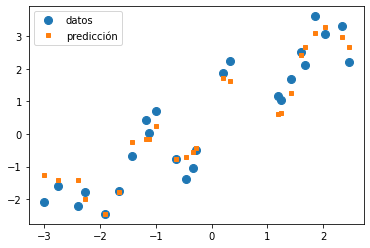

In [9]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="datos", markersize=8)
plt.plot(X_test, y_pred_test, 's', label="predicción", markersize=4)
plt.legend(loc='best');

Comparamos los datos de entrenamiento y los de test. Podemos ver que en el caso de entrenamiento coincide la mayoria y en el de test hay algunos comportamientos extra;os 
Ahora vemos el score de cada uno 

In [10]:
print(kneighbor_regression.score(X_train, y_train))
print(kneighbor_regression.score(X_test, y_test))

0.9872328993688151
0.9431578207616998


El score del test es mucho mejor que en la regresion lineal, y esto es porque un modelo lineal no era el mejor ajuste para el problema planteado


<div class="alert alert-success">
    <b>EJERCICIO</b>:
     <ul>
      <li>
      Compara KNeighborsRegressor y LinearRegression en el dataset boston housing. Puedes cargar el dataset utilizando ``sklearn.datasets.load_boston``. Puedes saber más de este dataset observando el atributo ``DESCR`` del objeto resultante.
      </li>
    </ul>
</div>

In [11]:
boston = datasets.load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Lo que tenemos es un dataset con 506 samples y 13 features. Por lo que si lo tratamos con regresion lineal, debe ser regresion lineal multiple, ya que tenemos 13 variables dependientes. 
Lo que haremos sera analizarlo con regresion lineal multilple y luego para KNN cambiando la cantidad de vecinos cercanos, para ver cual es el mejor valor. 


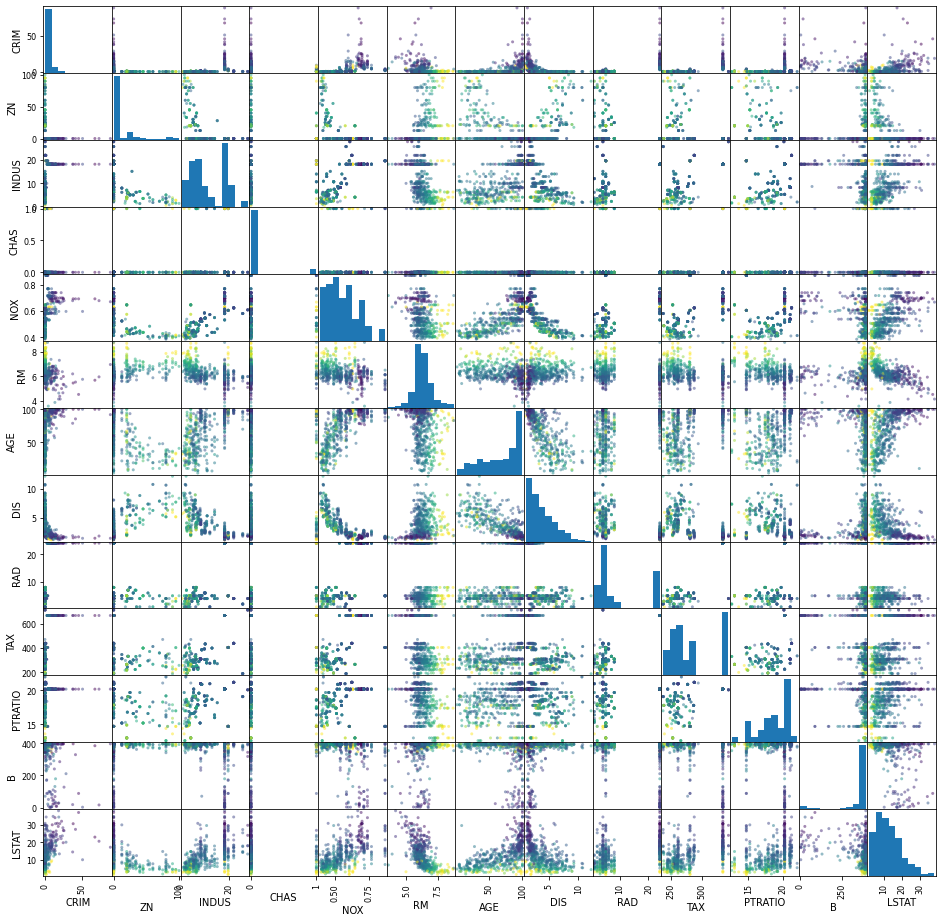

In [13]:
X = boston.data
y = boston.target 

boston_df = pd.DataFrame(X, columns=boston.feature_names)
pd.plotting.scatter_matrix(boston_df, c=y, figsize=(16, 16));

En el grafico anterior podemos comparar cada una de las caracteristicas versus las otras caracteristicas. Esto nos permite tener una idea de la correlacion entre ellas, y en caso de querer disminuir la dimensionalidad, saber cual elegir. Por ahora vamos a trabajar c

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

lr_multiple = linear_model.LinearRegression()
lr_multiple.fit(X_train,y_train)

print("Precision de entrenamiento",lr_multiple.score(X_train,y_train))
print("Precision de test",lr_multiple.score(X_test,y_test))
print("Coeficientes", lr_multiple.coef_)
print("Coeficientes", lr_multiple.intercept_)

Precision de entrenamiento 0.748087259862344
Precision de test 0.6844267283527068
Coeficientes [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
Coeficientes 29.8364201638386


En este caso no podemos graficarlo porque tenemos 13 caracteristica, osea, 13 dimensiones. Pero podemos ver que tenemos un score bastante bajo, lo que nos indicaria que este metodo no ajusta correctamente. Ahora veamos utilizando el algoritmo KNN y variando la cantidad de vecinos.



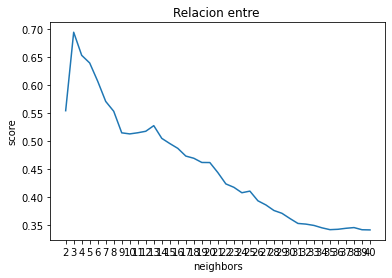

In [24]:
neighbors=np.arange(2, 41, 1)
lista=[]
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    lista.append(knn.score(X_test, y_test))
    
plt.plot(neighbors, lista)
plt.xticks(neighbors)
plt.title("Relacion entre ")
plt.xlabel("neighbors")
plt.ylabel("score")
plt.show()

Podemos ver que con aproximadamente 3 neighbors, tenemos el mejor score que es aproximadamente 0.7. Chequeamos cuanto es este numero realmente utilizando score


In [27]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)

print("Precision de entrenamiento", knn.score(X_train, y_train))
print("Precision de test", knn.score(X_test, y_test))

Precision de entrenamiento 0.7524897290455947
Precision de test 0.6946008632462907


Si comparamos con la regresion lineal multiple, vemos que casi no mejora ni el score de entrenamiento ni el de test. Lo que podria ser un indicio de que debemos buscar un mejor algortimo  para predecir, o quitar algunas caracteristicas que no sean relevantes. 

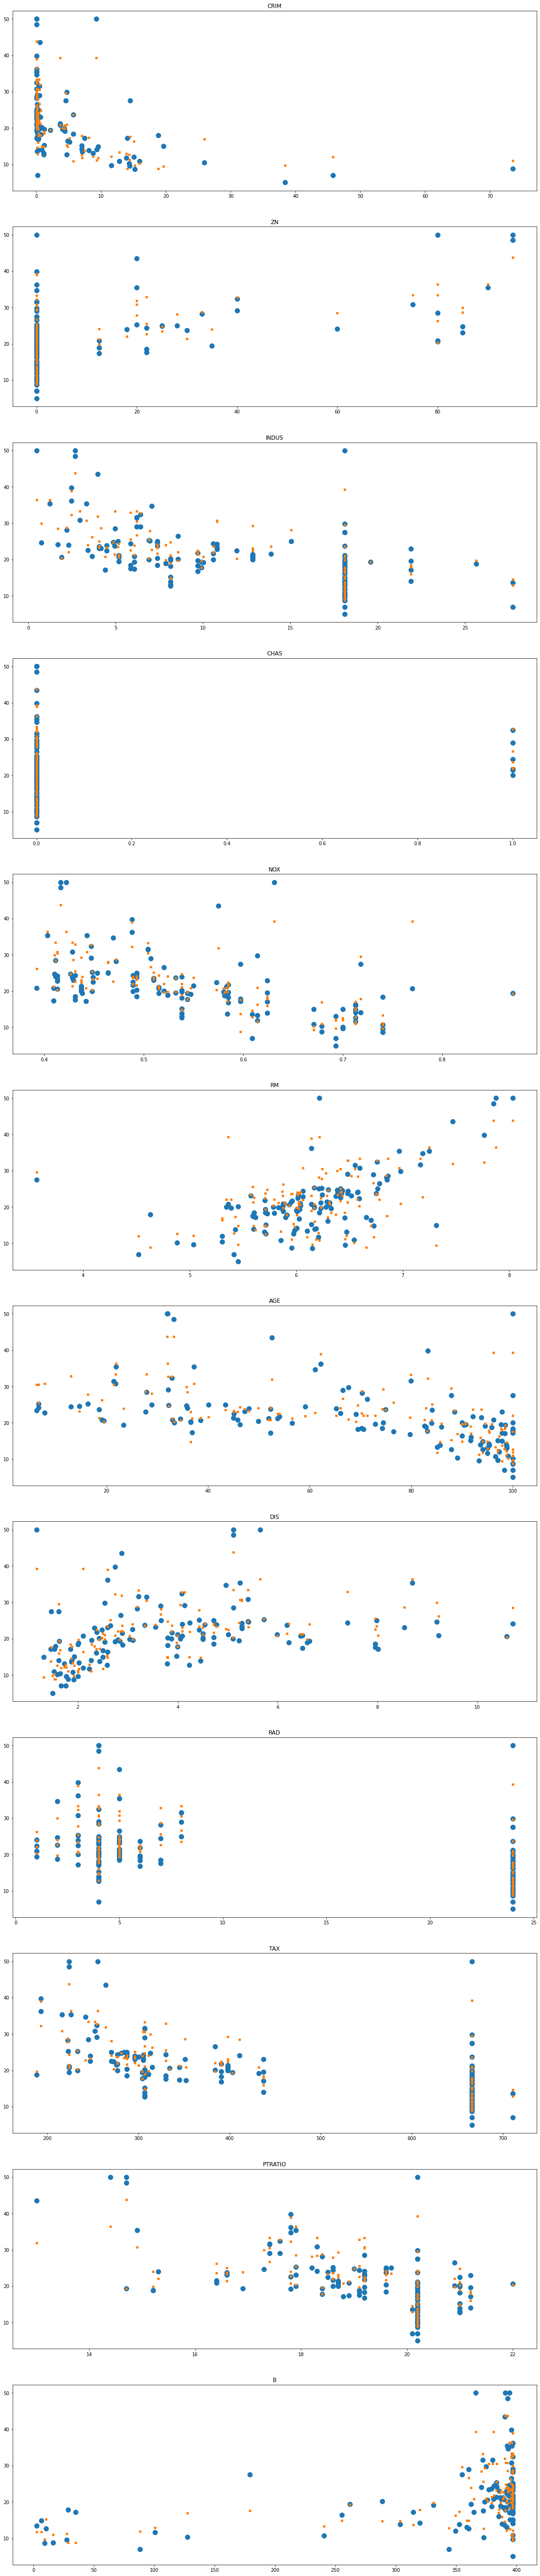

In [74]:
knn_prediction = knn.predict(X_test)

#for i in range(len(boston.feature_names)-1):
#    plt.plot(X_test[:,i], y_test, 'o', label="datos", markersize=10)
#    plt.plot(X_test[:,i], knn_prediction, 's', label="predicción", markersize=4)
#    plt.legend(loc='best');
#    plt.show()

fig, axs = plt.subplots(12,1,figsize=(20,100))

for i in range(len(boston.feature_names)-1):
    axs[i].plot(X_test[:,i], y_test, 'o', label="datos", markersize=10)
    axs[i].plot(X_test[:,i], knn_prediction, 's', label="predicción", markersize=4)
    axs[i].set_title(str(boston.feature_names[i]))

    


En el grafico anterior podemos ver la prediccion de cada carateristica para el conjunto de test. 
Vemos claramente que varias predicciones tienen errores, como indica el score de 0.7